In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

### Загрузка и подготовка данных

In [3]:
data = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Консультация\all_v2.csv")

In [4]:
data.head()

price        date      time    geo_lat    geo_lon  region  building_type  \
0  6050000  2018-02-19  20:00:21  59.805808  30.376141    2661              1   
1  8650000  2018-02-27  12:04:54  55.683807  37.297405      81              3   
2  4000000  2018-02-28  15:44:00  56.295250  44.061637    2871              1   
3  1850000  2018-03-01  11:24:52  44.996132  39.074783    2843              4   
4  5450000  2018-03-01  17:42:43  55.918767  37.984642      81              3   

   level  levels  rooms  area  kitchen_area  object_type  
0      8      10      3  82.6          10.8            1  
1      5      24      2  69.1          12.0            1  
2      5       9      3  66.0          10.0            1  
3     12      16      2  38.0           5.0           11  
4     13      14      2  60.0          10.0            1

In [5]:
data.shape

(5477006, 13)

In [6]:
df = data.sample(frac = 0.001, random_state = 42).reset_index(drop = True)
df.head()

price        date      time    geo_lat    geo_lon  region  \
0  13719304  2020-06-02  21:21:22  55.869536  37.458076       3   
1   1601000  2019-06-30  06:06:07  55.030393  83.015545    9654   
2   1200000  2019-08-21  02:37:16  55.030393  83.015545    9654   
3   1650000  2018-12-19  22:04:21  45.141191  38.992274    2843   
4   6100000  2020-11-18  18:26:54  43.651925  39.652122    2843   

   building_type  level  levels  rooms   area  kitchen_area  object_type  
0              2      5      20      1  53.00          10.0           11  
1              1      5      10      3  59.02           8.5           11  
2              1      1      10     -1  33.58           5.0           11  
3              2      6       7      1  40.00          10.0            1  
4              2      6      13      2  47.60          10.0           11

In [7]:
df.shape

(5477, 13)

### Альтернативные методы тестирования нормальности распределения площади для 1к и 2к квартир

In [47]:
df1k = df.loc[(df['rooms']==1)&(df['area']<100), 'area']
df2k = df.loc[(df['rooms']==2)&(df['area']<100), 'area']

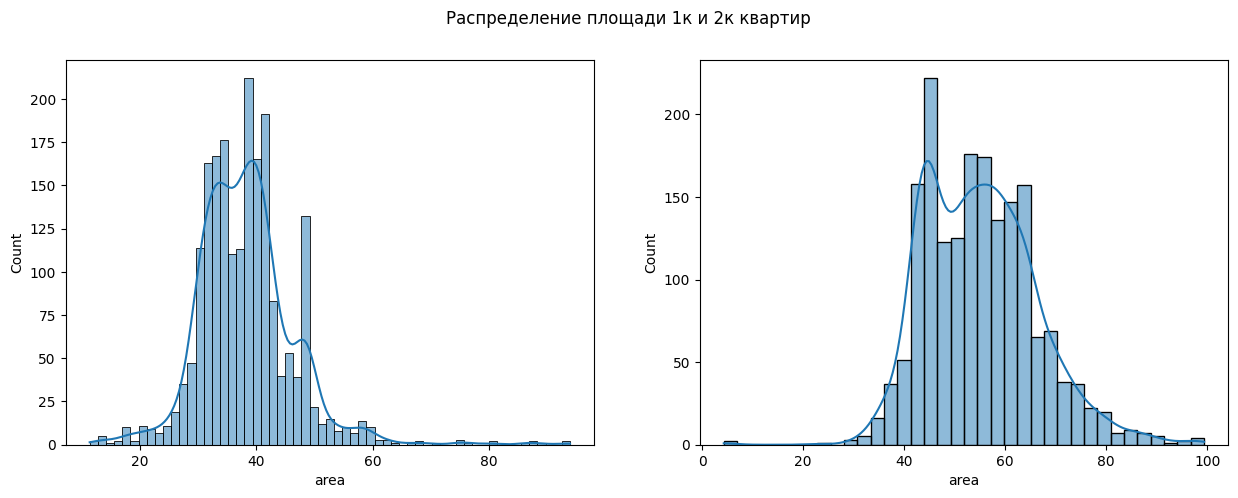

In [48]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение площади 1к и 2к квартир')
sns.histplot(df1k, kde = True, ax = ax[0])
sns.histplot(df2k, kde = True, ax = ax[1])
plt.show()

In [52]:
print('Средняя: ', df1k.mean())
print('Медиана: ', df1k.median())
print('Скошенность: ', stats.skew(df1k))
print('Эксцесс: ', stats.kurtosis(df1k))

Средняя:  38.236745098039215
Медиана:  38.0
Скошенность:  1.2216397378771051
Эксцесс:  5.883696689641296


In [50]:
print('Средняя: ', df2k.mean())
print('Медиана: ', df2k.median())
print('Скошенность: ', stats.skew(df2k))
print('Эксцесс: ', stats.kurtosis(df2k))

Средняя:  55.01781198460693
Медиана:  54.0
Скошенность:  0.5012398627317909
Эксцесс:  0.80787493359324


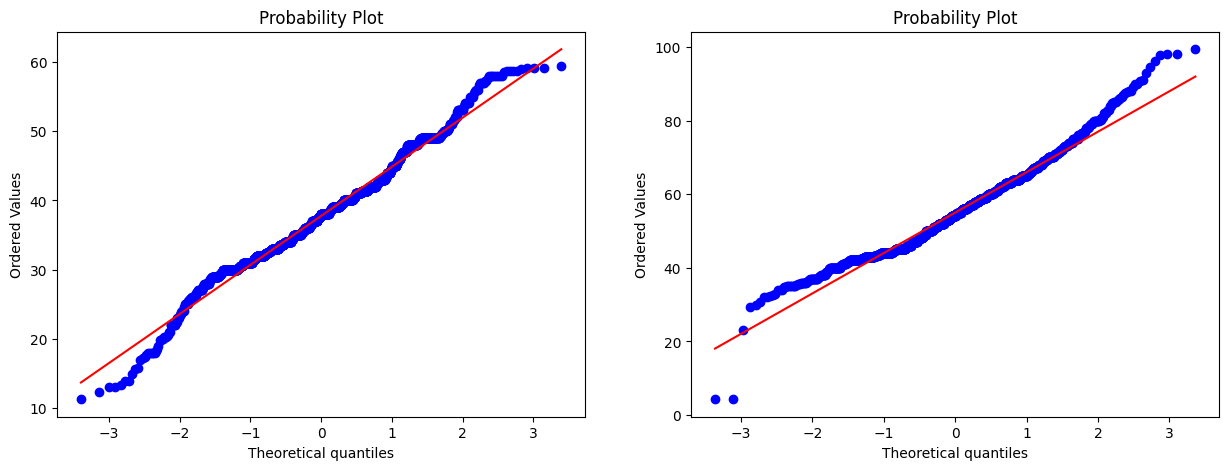

In [77]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.title('QQ-plot для 1к и 2к квартир')
stats.probplot(df1k[df1k<60], dist="norm", plot = ax[0])
stats.probplot(df2k, dist="norm", plot = ax[1])
plt.show()

### Тест Манна-Уитни о равенстве цен на 1к и 2к квартиры

In [79]:
df1k_price = df.loc[(df['rooms']==1)&(df['area']<100)&(df['price']<5000000), 'price']
df2k_price = df.loc[(df['rooms']==2)&(df['area']<100)&(df['price']<5000000), 'price']

In [80]:
stats.mannwhitneyu(df1k_price, df2k_price, alternative = 'two-sided')

MannwhitneyuResult(statistic=np.float64(840965.5), pvalue=np.float64(1.068478842175426e-45))

Поскольку р-значение существенно меньше 5%, нулевая гипотеза теста о том, что формы распределения цен на 1к квартиры и 2к квартиры совпадают (в т.ч., что совпадают их медианы), отвергается. Медианные цены на 1к и 2к квартиры не равны!

### Тест Уилкоксона о равенстве цен на 1к квартиры в 2019 и 2020 годах

In [104]:
df['date'] = pd.to_datetime(df['date'])
df1k_2019 = df.loc[(df['rooms']==1)&(df['date'].dt.year == 2019), 'price'].sample(100, random_state = 42)
df1k_2020 = df.loc[(df['rooms']==1)&(df['date'].dt.year == 2020), 'price'].sample(100, random_state = 42)

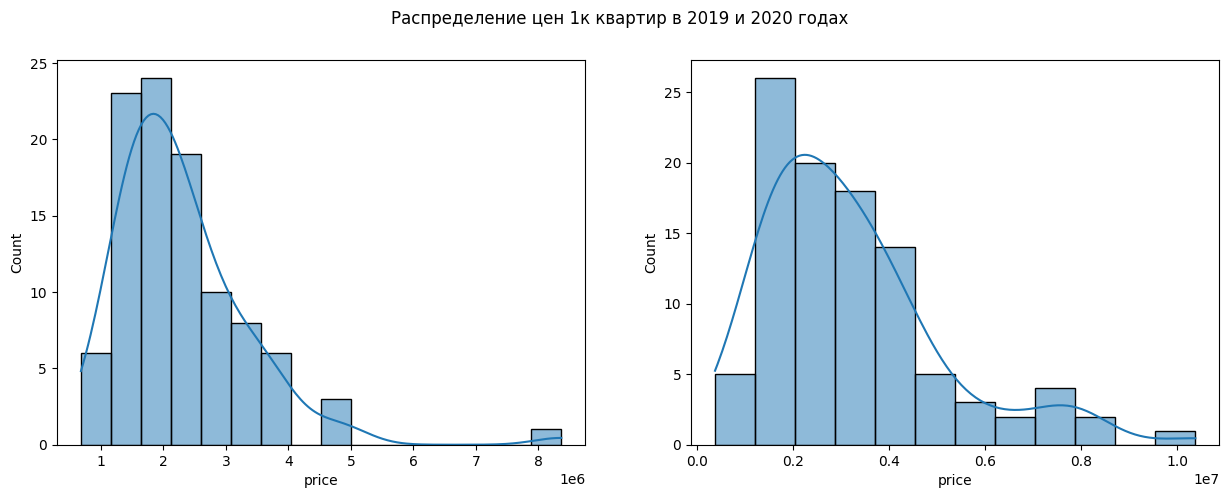

In [105]:
fig, ax  = plt.subplots(1,2, figsize = (15,5))
plt.suptitle('Распределение цен 1к квартир в 2019 и 2020 годах')
sns.histplot(df1k_2019, kde = True, ax = ax[0])
sns.histplot(df1k_2020, kde = True, ax = ax[1])
plt.show()

In [106]:
print('Средняя цена в 2019', df1k_2019.mean())
print('Средняя цена в 2020', df1k_2020.mean())
print('Медианная цена в 2019', df1k_2019.median())
print('Медианная цена в 2020', df1k_2020.median())

Средняя цена в 2019 2292107.46
Средняя цена в 2020 3198781.65
Медианная цена в 2019 2100000.0
Медианная цена в 2020 2825000.0


In [107]:
stats.wilcoxon(df1k_2019.values, df1k_2020.values)

WilcoxonResult(statistic=np.float64(1443.5), pvalue=np.float64(0.00020034046421775923))

р-значение теста указывает, что между ценами 2019 и ценами 2020 года существует разница

### Тест Пирсона (Хи-квадрат) о взаимосвязи материала дома и количества комнат

In [108]:
mat_dict = {0 : 'Other',  1 : 'Panel',  2 : 'Monolithic', 3 : 'Brick', 4 : 'Blocky', 5 :'Wooden'}
rooms_dict = {-1: 'Studio', 1 : '1k', 2 : '2k', 3 : '3k'}
df['rooms_adj'] = df['rooms'].map(rooms_dict).fillna('more')
df['material'] = df['building_type'].map(mat_dict)

In [109]:
df_heat = pd.crosstab(df['rooms_adj'], df['material'])
df_heat

material   Blocky  Brick  Monolithic  Other  Panel  Wooden
rooms_adj                                                 
1k             63    661         478    123    713       2
2k             54    661         372    105    632       4
3k             35    399         193     41    441       3
Studio          9     61          61     16    150       1
more            3     86          22     13     73       2

In [110]:
stats.chi2_contingency(df_heat)

Chi2ContingencyResult(statistic=np.float64(87.59452224600322), pvalue=np.float64(1.9464527880068707e-10), dof=20, expected_freq=array([[6.10845353e+01, 6.95767756e+02, 4.19397480e+02, 1.10995070e+02,
        7.48285558e+02, 4.46960015e+00],
       [5.47365346e+01, 6.23462479e+02, 3.75813036e+02, 9.94602885e+01,
        6.70522549e+02, 4.00511229e+00],
       [3.32970604e+01, 3.79261640e+02, 2.28612744e+02, 6.05031952e+01,
        4.07888990e+02, 2.43637028e+00],
       [8.92313310e+00, 1.01636662e+02, 6.12649261e+01, 1.62139858e+01,
        1.09308381e+02, 6.52912178e-01],
       [5.95873653e+00, 6.78714625e+01, 4.09118130e+01, 1.08274603e+01,
        7.29945225e+01, 4.36005112e-01]]))

У этого теста нулевая гипотеза говорит, что между двумя категориальными переменными зависимости нет.

р-значение существенно ниже 5%, следовательно, данные противоречат нулевой гипотезе и мы можем ее отвергнуть.

Между материалом дома и количеством комнат есть значимая зависимость

### Коэффициенты корреляции Пирсона и Спирмана

In [114]:
stats.pearsonr(df['area'], df['rooms'])

PearsonRResult(statistic=np.float64(0.6398590930356629), pvalue=np.float64(0.0))

In [111]:
stats.spearmanr(df['area'], df['rooms'])

SignificanceResult(statistic=np.float64(0.8141971771479491), pvalue=np.float64(0.0))

In [113]:
x = np.array([-2,-1,0,1,2])
y = x**2
np.corrcoef(x,y)

array([[1., 0.],
       [0., 1.]])

### Линейная регрессия цены на площадь квартиры

In [13]:
X = np.array(df['area'])
Y = np.array(df['price']/1000000)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     74.24
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.93e-18
Time:                        19:29:13   Log-Likelihood:                -26244.
No. Observations:                5477   AIC:                         5.249e+04
Df Residuals:                    5475   BIC:                         5.250e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1114      0.914     -3.404      0.0

In [14]:
df.head()

price        date      time    geo_lat    geo_lon  region  \
0  13719304  2020-06-02  21:21:22  55.869536  37.458076       3   
1   1601000  2019-06-30  06:06:07  55.030393  83.015545    9654   
2   1200000  2019-08-21  02:37:16  55.030393  83.015545    9654   
3   1650000  2018-12-19  22:04:21  45.141191  38.992274    2843   
4   6100000  2020-11-18  18:26:54  43.651925  39.652122    2843   

   building_type  level  levels  rooms   area  kitchen_area  object_type  
0              2      5      20      1  53.00          10.0           11  
1              1      5      10      3  59.02           8.5           11  
2              1      1      10     -1  33.58           5.0           11  
3              2      6       7      1  40.00          10.0            1  
4              2      6      13      2  47.60          10.0           11

In [17]:
X = np.array(df[['area', 'level', 'rooms', 'kitchen_area']])
Y = np.array(df['price']/1000000)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.01
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.78e-18
Time:                        19:44:19   Log-Likelihood:                -26237.
No. Observations:                5477   AIC:                         5.248e+04
Df Residuals:                    5472   BIC:                         5.252e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4226      1.078     -3.174      0.0

$Price_i = -3.42 + 0.16\cdot area_i + 0.08 \cdot level_i - 1.51 \cdot rooms_i + 0.07 \cdot kitchen_i $

Влияние этажа и площади кухни на цену статистически не подтверждены, т.е. они не отличаются от нуля

In [18]:
X = np.array(df[['area', 'rooms']])
Y = np.array(df['price']/1000000)
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     43.04
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           2.84e-19
Time:                        19:47:27   Log-Likelihood:                -26238.
No. Observations:                5477   AIC:                         5.248e+04
Df Residuals:                    5474   BIC:                         5.250e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6412      0.923     -2.860      0.0